# American Loans Exploration

## Preliminary Wrangling

This document explores a dataset containing loans and attributes for approximately 110,000 persons in USA.

In [1]:
#import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# Setup seaborn general plots options
# figure size fo rpage A4: 11.69, 8.27
# figure size for screen 16:9: 14.70, 8.27
plt.figure(figsize=(14.70, 8.27))
sb.set(rc={'figure.figsize':(14.70, 8.27),"axes.titlesize":18,"axes.labelsize":15, 'axes.titleweight':'bold','xtick.labelsize': 12, 'ytick.labelsize': 12},style="darkgrid")

%matplotlib inline

In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
#load loan dataset
df = pd.read_csv("prosperLoanData.csv")
df_archive = df.copy()

In [3]:
#preview dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#crop the intentded varibales to be studied only
df = pd.concat([df['LoanOriginalAmount'], df.iloc[:, 5: 23].drop(['ClosedDate','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)', 'ProsperRating (Alpha)','ProsperScore', 'EmploymentStatusDuration'], axis=1)],axis=1)

In [5]:
# Preview the dataset breif information and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginalAmount         113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   BorrowerRate               113937 non-null  float64
 4   LenderYield                113937 non-null  float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   Occupation                 110349 non-null  object 
 8   EmploymentStatus           111682 non-null  object 
 9   IsBorrowerHomeowner        113937 non-null  bool   
 10  CurrentlyInGroup           113937 non-null  bool   
dtypes: bool(2), float64(3), int64(2), object(4)
memory usage: 8.0+ MB


**Interest rate** refers to the annual cost of a loan to a borrower and is expressed as a percentage
<br>**APR** is the annual cost of a loan to a borrower — including fees. Like an interest rate, the APR is expressed as a percentage. Unlike an interest rate, however, it includes other charges or fees such as mortgage insurance, most closing costs, discount points and loan origination fees.
<br>**LenderYield**: the percent of lender yield. The intereset rate without fees.

As BorrowerRate and BorrowerRate approximatly provide the same information, we can use BorrowerAPR insted of the two columns

In [6]:
#drop BorrowerRate column
df = df.drop(['BorrowerRate'], axis=1)
#check df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginalAmount         113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   LenderYield                113937 non-null  float64
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   BorrowerState              108422 non-null  object 
 6   Occupation                 110349 non-null  object 
 7   EmploymentStatus           111682 non-null  object 
 8   IsBorrowerHomeowner        113937 non-null  bool   
 9   CurrentlyInGroup           113937 non-null  bool   
dtypes: bool(2), float64(2), int64(2), object(4)
memory usage: 7.2+ MB


This study aims to study the relation between loans and location, occubation, Employment status, BorrowerRate.
Therefore the null values in rows in BorrowerState, Occubation and EmploymentStatus will be deleted

In [7]:
#remove rows that contain null values
df =df.dropna(axis=0).reset_index(drop=True)
#check df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106221 entries, 0 to 106220
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginalAmount         106221 non-null  int64  
 1   LoanStatus                 106221 non-null  object 
 2   BorrowerAPR                106221 non-null  float64
 3   LenderYield                106221 non-null  float64
 4   ListingCategory (numeric)  106221 non-null  int64  
 5   BorrowerState              106221 non-null  object 
 6   Occupation                 106221 non-null  object 
 7   EmploymentStatus           106221 non-null  object 
 8   IsBorrowerHomeowner        106221 non-null  bool   
 9   CurrentlyInGroup           106221 non-null  bool   
dtypes: bool(2), float64(2), int64(2), object(4)
memory usage: 6.7+ MB


``ListingCategory``: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [8]:
df['ListingCategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12], dtype=int64)

In [9]:
#Create a readable column from ListingCategory column
df['ListingCategory'] = df["ListingCategory (numeric)"].replace({0: "Not Available", 1: "Debt Consolidation", 2:"Home Improvement", 3:"Business", 4:"Personal Loan", 5:"Student Use", 6:"Auto", 7:"Other", 8:"Baby&Adoption", 9:"Boat", 10:"Cosmetic Procedure", 11:"Engagement Ring", 12:"Green Loans", 13:"Household Expenses", 14:"Large Purchases", 15:"Medical/Dental", 16:"Motorcycle", 17:"RV", 18:"Taxes", 19:"Vacation", 20:"Wedding Loans" })
#drop ListingCategory (numeric) column
df = df.drop(['ListingCategory (numeric)'], axis=1)
#check if process is done correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106221 entries, 0 to 106220
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   LoanOriginalAmount   106221 non-null  int64  
 1   LoanStatus           106221 non-null  object 
 2   BorrowerAPR          106221 non-null  float64
 3   LenderYield          106221 non-null  float64
 4   BorrowerState        106221 non-null  object 
 5   Occupation           106221 non-null  object 
 6   EmploymentStatus     106221 non-null  object 
 7   IsBorrowerHomeowner  106221 non-null  bool   
 8   CurrentlyInGroup     106221 non-null  bool   
 9   ListingCategory      106221 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 6.7+ MB


The following defentions helped in analyzing ``LoanStatus``:
<br>**Chargedoff**: The account for the related loan is closed, but still shall pay the loan
<br>**Defaulted**: Borrower fails to pay over the course of weeks or months.
<br>**Past Due**:Past due refers to a payment that has not been made by its cutoff time at the end of its due date
<br>**Current**: All payments of principal and interest then due have been paid
<br>**FinalPaymentInProgress**: paying the last loan payment
<br>**Completed**: Finished paying the loan
<br>**Cancelled**: Cancel the loan

In [10]:
df[df['LoanStatus']=='Cancelled']

,LoanOriginalAmount,LoanStatus,BorrowerAPR,LenderYield,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,ListingCategory
105325,1000,Cancelled,0.16219,0.0975,FL,Other,Full-time,False,False,Debt Consolidation


From 106,221 loans there is only one **Cancelled** loan, then we can delete this row, as it does not give enough indication about loans, and the people who cancel their loans

In [11]:
df = df[df['LoanStatus']!='Cancelled'].reset_index(drop=True)

Let's consolidate the similar ``LoanStatus`` similar values togather:
- **Past Due** variances
- **FinalPaymentInProgress** with **Completed**

In [12]:
df['LoanStatus'][df.LoanStatus.str.contains('Past Due')] = 'Past Due'
df['LoanStatus'][df.LoanStatus.str.contains('FinalPaymentInProgress')] = 'Completed'

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df['LoanStatus'].value_counts()

Current       55272
Completed     33971
Chargedoff    10833
Defaulted      4091
Past Due       2053
Name: LoanStatus, dtype: int64

In [14]:
# convert the type of LoanStatus into categorical
ordinal_var_dict = {'LoanStatus': ['Chargedoff', 'Defaulted', 'Past Due', 'Current', 'Completed'],
}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [15]:
# Show numric variables statistics descriptive summary
print(df.describe())

       LoanOriginalAmount    BorrowerAPR    LenderYield
count       106220.000000  106220.000000  106220.000000
mean          8527.284052       0.220435       0.183423
std           6283.345445       0.080996       0.075151
min           1000.000000       0.006530      -0.010000
25%           4000.000000       0.157130       0.124375
50%           7000.000000       0.211500       0.174000
75%          12000.000000       0.287040       0.242400
max          35000.000000       0.423950       0.340000


In [16]:
#it is normal to get negative LenderYield in loans
df[df['LenderYield'] <  0]

,LoanOriginalAmount,LoanStatus,BorrowerAPR,LenderYield,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,ListingCategory
43749,1900,Defaulted,0.01315,-0.0100,NY,Professional,Full-time,False,False,Not Available
46888,5000,Completed,0.01325,-0.0099,AR,Professional,Full-time,False,False,Debt Consolidation
49859,1100,Completed,0.01548,-0.0095,CO,Realtor,Full-time,False,False,Not Available
49989,2600,Defaulted,0.00864,-0.0029,PA,Clerical,Not available,False,True,Not Available
60848,1000,Completed,0.01987,-0.0100,NC,Other,Full-time,False,False,Business
71664,3000,Completed,0.00653,-0.0100,MI,Food Service Management,Full-time,False,True,Not Available
72530,1200,Completed,0.01875,-0.0050,MI,Construction,Full-time,False,True,Not Available
73109,5000,Completed,0.00653,-0.0050,NJ,Other,Not available,False,True,Not Available
73588,25000,Completed,0.01987,-0.0100,NJ,Dentist,Full-time,True,True,Debt Consolidation
83978,1000,Completed,0.01650,-0.0050,IN,Sales - Retail,Not available,True,False,Not Available


### Structure of dataset
There are 106,221 persons in the dataset with 11 features (LoanOriginalAmount, LoanStatus, BorrowerAPR, BorrowerRate, LenderYield, ListingCategory, BorrowerState, Occupation, EmploymentStatus, IsBorrowerHomeowner and CurrentlyInGroup). Most variables are numeric in nature, but the variable LoanStatus is ordered factor variable with the following levels.

(worst) ——> (best)
LoanStatus: 'Chargedoff', 'Defaulted', 'Past Due', 'Current', 'Completed'

### The main features of interest in dataset
Intereseted in finding the most effecting factors in high loan values and being not capable of payiing them

### Features support the investigation:
I expect that the occupation, EmploymentStatus, BorrowerState can give hints to find the main reason for being uncapable of paying loans

## Univariate Exploration
I'll start by looking at the distribution of the main variable of interest: LoanOriginalAmount.

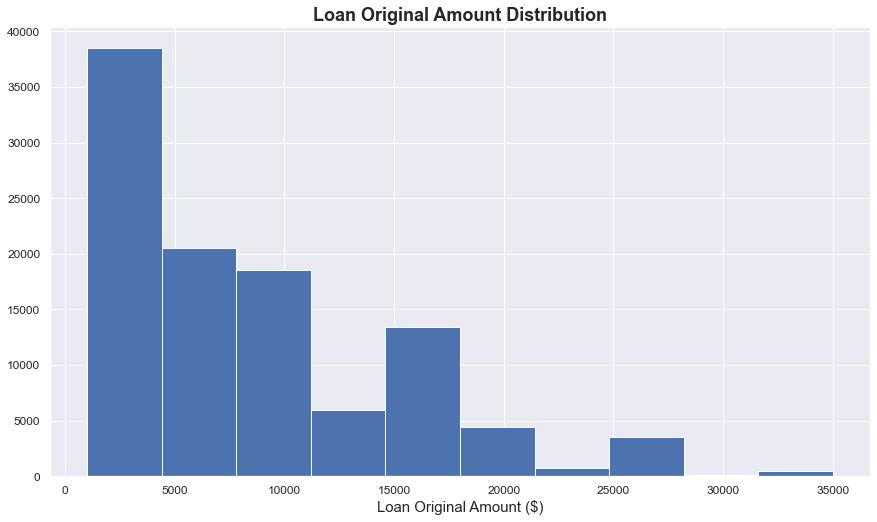

In [17]:
# Preview loans' values distribution

df['LoanOriginalAmount'].plot(kind='hist', figsize=(14.70, 8.27),
                                    title="Loan Original Amount Distribution")
plt.xlabel("Loan Original Amount ($)");
plt.ylabel("");

In [18]:
df['LoanOriginalAmount'].describe()

count    106220.000000
mean       8527.284052
std        6283.345445
min        1000.000000
25%        4000.000000
50%        7000.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

The histogram showed that 75% of the studied sample have borrowed less than 12k$ and only 25% borrowed more than this value

In [19]:
len(df[df['LoanOriginalAmount']<=4000])/len(df)

0.3593391075127095

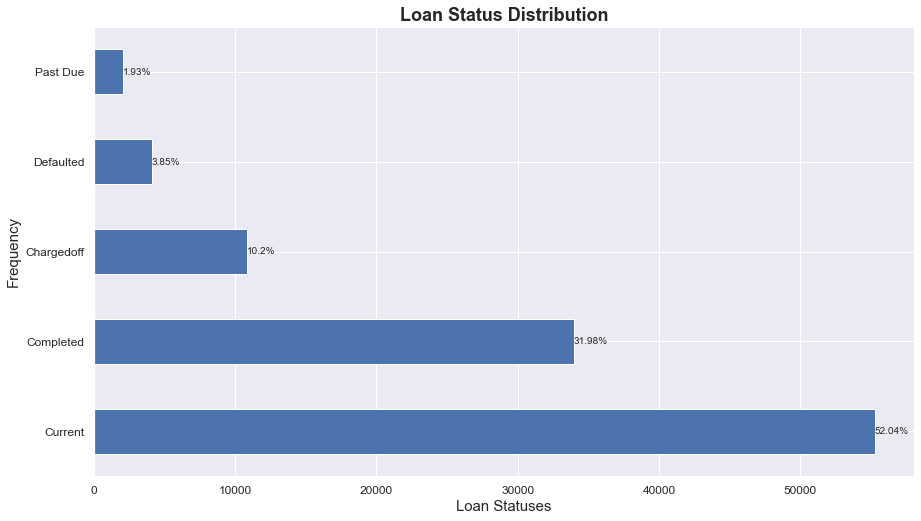

In [20]:
values=df['LoanStatus'].value_counts()
values.plot(kind='barh', figsize=(14.70, 8.27), title="Loan Status Distribution")
plt.xlabel("Loan Statuses")
plt.ylabel("Frequency");
for i in range(len(values)):
    plt.annotate(str(round(values[i]/sum(values)*100,2))+"%", xy=(values[i], i), ha='left', va='center')

Loan Statuses percentages indicates that more than 83% of US borrowers pay their premiums regularly.

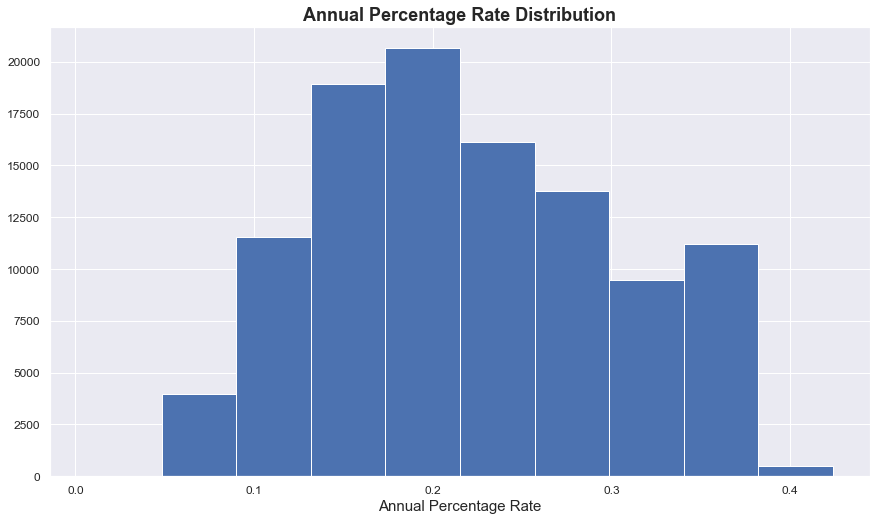

In [21]:
df['BorrowerAPR'].plot(kind='hist', figsize=(14.70, 8.27), title="Annual Percentage Rate Distribution")
plt.xlabel("Annual Percentage Rate");
plt.ylabel("");

In [22]:
len(df[(df['BorrowerAPR']>=0.1) & (df['BorrowerAPR']<=.35)])/len(df)

0.8400677838448503

In [23]:
len(df[(df['BorrowerAPR']>=0.1) & (df['BorrowerAPR']<=0.25)])/len(df)

0.5853794012427038

This histogram shows that in USA, 84% of loans **Annual Percentage Rate** falls between the values [0.1, 0.35].

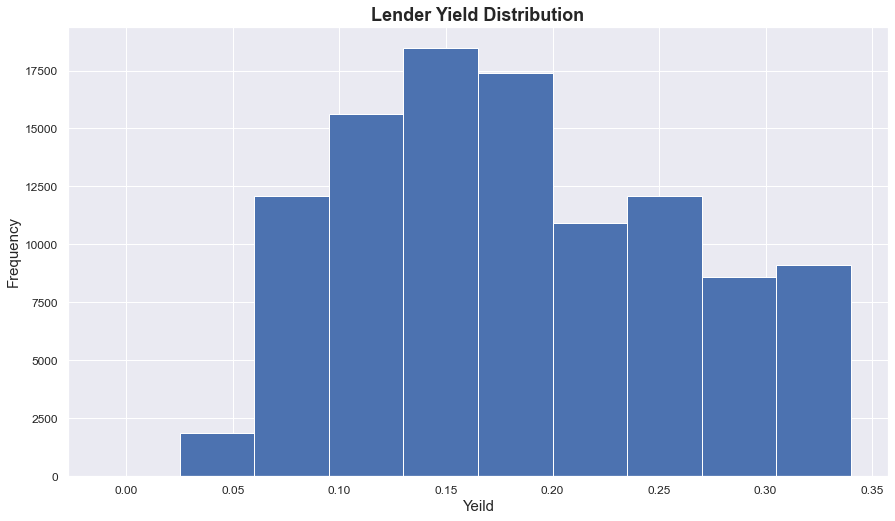

In [24]:
df['LenderYield'].plot(kind='hist', figsize=(14.70, 8.27), title="Lender Yield Distribution")
plt.xlabel("Yeild");
plt.ylabel("Frequency");

In [25]:
print(len(df[(df['LenderYield']>=0.06) & (df['LenderYield']<=0.31)])/len(df))

0.9502824326868763


In [26]:
np.percentile(df['LenderYield'], 2.5),np.percentile(df['LenderYield'], 97.5)

(0.0649, 0.3204)

``LenderYeild`` histogram shows that 95% of loans, the lender yeild falls between the values [0.065, 0.32]

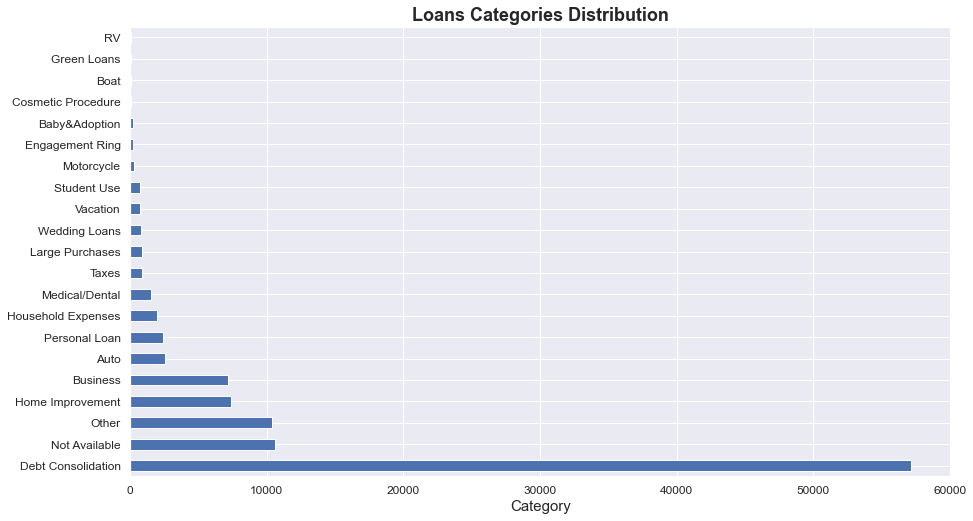

In [27]:
df['ListingCategory'].value_counts().plot(kind='barh', figsize=(14.70, 8.27), title="Loans Categories Distribution")
plt.xlabel("Category");
plt.ylabel("");
# for i in range(len(values)):
#     plt.annotate(str(values[i]), xy=(i,values[i]), ha='center', va='bottom')


In [28]:
print('Debt Consolidation=', str(len(df[df['ListingCategory']=='Debt Consolidation'])/len(df)))
print('Not Available=', str(len(df[df['ListingCategory']=='Not Available'])/len(df)))
print('Other=', str(len(df[df['ListingCategory']=='Other'])/len(df)))
print('Home Improvement=', str(len(df[df['ListingCategory']=='Home Improvement'])/len(df)))
print('Business=', str(len(df[df['ListingCategory']=='Business'])/len(df)))
print('Auto=', str(len(df[df['ListingCategory']=='Auto'])/len(df)))
print('Student Use=', str(len(df[df['ListingCategory']=='Student Use'])/len(df)))

Debt Consolidation= 0.5383543588778008
Not Available= 0.10000941442289588
Other= 0.09786292600263603
Home Improvement= 0.06959141404631897
Business= 0.06756731312370552
Auto= 0.02409150819054792
Student Use= 0.007107889286386744


* The histogram above showed that usually lenders consolidate borrowers debts together, with more than 53% of loans have `Debt Consolidation` category
* 10% of loans categories are unavailable
* 9% of loans does not belong to any of the categories list
* The clear loan categories are `Home Imporvement` and `Bussines` with approximaly **7%** each of the entires loans list

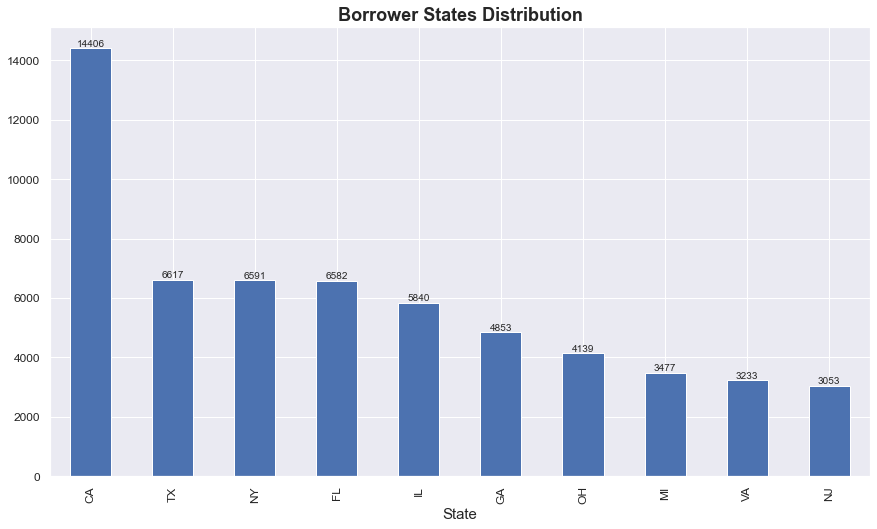

In [29]:
values = df['BorrowerState'].value_counts()[0:10]
values.plot(kind='bar', figsize=(14.70, 8.27), title="Borrower States Distribution")
plt.xlabel("State");
plt.ylabel("");
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(i,values[i]), ha='center', va='bottom');

In [30]:
print("The percent of California population to USA is 11.8%. The percent of CA loans from the entire USA Loans is:{:.4f}%".format(len(df[df['BorrowerState']=="CA"])/len(df)*100))
print("The percent of Texas population to USA is 8.8%. The percent of TX loans from the entire USA Loans is:{:.4f}%".format(len(df[df['BorrowerState']=="TX"])/len(df)*100))
print("The percent of New York population to USA is 5.8%. The percent of NY loans from the entire USA Loans is:{:.4f}%".format(len(df[df['BorrowerState']=="NY"])/len(df)*100))
print("The percent of Florida population to USA is 6.5%. The percent of FL loans from the entire USA Loans is:{:.4f}%".format(len(df[df['BorrowerState']=="FL"])/len(df)*100))
print("The percent of Illinois population to USA is 3.78%. The percent of IL loans from the entire USA Loans is:{:.4f}%".format(len(df[df['BorrowerState']=="IL"])/len(df)*100))
print("The percent of Georgia population to USA is 3.5%. The percent of GA loans from the entire USA Loans is:{:.4f}%".format(len(df[df['BorrowerState']=="GA"])/len(df)*100))
print("The percent of Ohio population to USA is 3.22%. The percent of OH loans from the entire USA Loans is:{:.4f}%".format(len(df[df['BorrowerState']=="OH"])/len(df)*100))
print("The percent of Pennsylvania population to USA is 3.84%. The percent of PA loans from the entire USA Loans is:{:.4f}%".format(len(df[df['BorrowerState']=="PA"])/len(df)*100))

The percent of California population to USA is 11.8%. The percent of CA loans from the entire USA Loans is:13.5624%
The percent of Texas population to USA is 8.8%. The percent of TX loans from the entire USA Loans is:6.2295%
The percent of New York population to USA is 5.8%. The percent of NY loans from the entire USA Loans is:6.2050%
The percent of Florida population to USA is 6.5%. The percent of FL loans from the entire USA Loans is:6.1966%
The percent of Illinois population to USA is 3.78%. The percent of IL loans from the entire USA Loans is:5.4980%
The percent of Georgia population to USA is 3.5%. The percent of GA loans from the entire USA Loans is:4.5688%
The percent of Ohio population to USA is 3.22%. The percent of OH loans from the entire USA Loans is:3.8966%
The percent of Pennsylvania population to USA is 3.84%. The percent of PA loans from the entire USA Loans is:2.7547%


In [31]:
df.groupby(['BorrowerState'])['LoanOriginalAmount'].describe().sort_values(by=['count', 'mean'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
BorrowerState,,,,,,,,
CA,14406.0,9016.319520,6633.542597,1000.0,4000.0,7000.0,13500.00,35000.0
TX,6617.0,9219.666163,6593.712374,1000.0,4000.0,7500.0,15000.00,35000.0
NY,6591.0,8863.498103,6448.076823,1000.0,4000.0,7000.0,13000.00,35000.0
FL,6582.0,8249.691279,5969.464343,1000.0,4000.0,6500.0,11500.00,35000.0
IL,5840.0,8409.367637,6362.404459,1000.0,3500.0,6500.0,12000.00,35000.0
GA,4853.0,8410.531012,6164.069220,1000.0,4000.0,6000.0,11600.00,35000.0
OH,4139.0,8087.988645,5895.880889,1000.0,4000.0,6500.0,10500.00,35000.0
MI,3477.0,7727.697728,5805.959363,1000.0,3500.0,5500.0,10000.00,35000.0
VA,3233.0,8986.852459,6517.240495,1000.0,4000.0,7500.0,13500.00,35000.0


* The **top ten showed loans states** are the same **top ten popultion states**, for example California is largest state in terms of population with more than 39 million person and 13.56%  of entire dataset loans
* Generally, the **loans states percent** equals the state population percent of entire USA population with **+-2%**
* The previous table showed that generally, the `LoanOriginalAmount` on average ranges are between 7,000 and 10,000 dollars regardless of the state
- Only for last four rows the values are much less than that, reaches to 4,244. And these states take very much less loans than other states as their population percetnages are less than 0.2% of the entire USA population
* These results leads us, that there is generally **no clear relation** between the **state** and the **loans counts**

In [32]:
df['Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Construction', 'Computer Programmer', 'Sales - Commission',
       'Retail Management', 'Engineer - Mechanical', 'Military Enlisted',
       'Clerical', 'Teacher', 'Clergy', 'Accountant/CPA', 'Attorney',
       'Nurse (RN)', 'Analyst', 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Waiter/Waitress', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',
       'Student - College Se

In [33]:
#Create a readable column from Occupation column
df['Occupation'][df.Occupation.str.contains('Student')] = 'Student'
df['Occupation'][df.Occupation.str.contains('Engineer')] = 'Engineer'
df['Occupation'][df.Occupation.str.contains('Tradesman')] = 'Tradesman' 
df['Occupation'][df.Occupation.str.contains('Nurse')] = 'Nurse'  
df['Occupation']= df['Occupation'].replace({'Clergy': "Religious",  'Waiter/Waitress': "Food Service", 'Sales - Commission':'Sales',  'Sales - Retail': "Sales", 'Psychologist':'Scientist', 'Biologist':'Scientist', 'Chemist':'Scientist' })

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing t

In [34]:
df['Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive', 'Sales',
       'Laborer', 'Food Service', 'Fireman', 'Construction',
       'Computer Programmer', 'Retail Management', 'Engineer',
       'Military Enlisted', 'Clerical', 'Teacher', 'Religious',
       'Accountant/CPA', 'Attorney', 'Nurse', 'Analyst', 'Investor',
       'Realtor', 'Flight Attendant', 'Military Officer',
       'Food Service Management', 'Truck Driver',
       'Administrative Assistant', 'Police Officer/Correction Officer',
       'Social Worker', 'Tradesman', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist', 'Scientist',
       'Dentist', 'Architect', 'Landscaping', 'Bus Driver', 'Doctor',
       'Student', 'Principal', "Teacher's Aide",
       'Pilot - Private/Commercial', 'Homemaker', 'Judge', 'Car Dealer'],
      dtype=object)

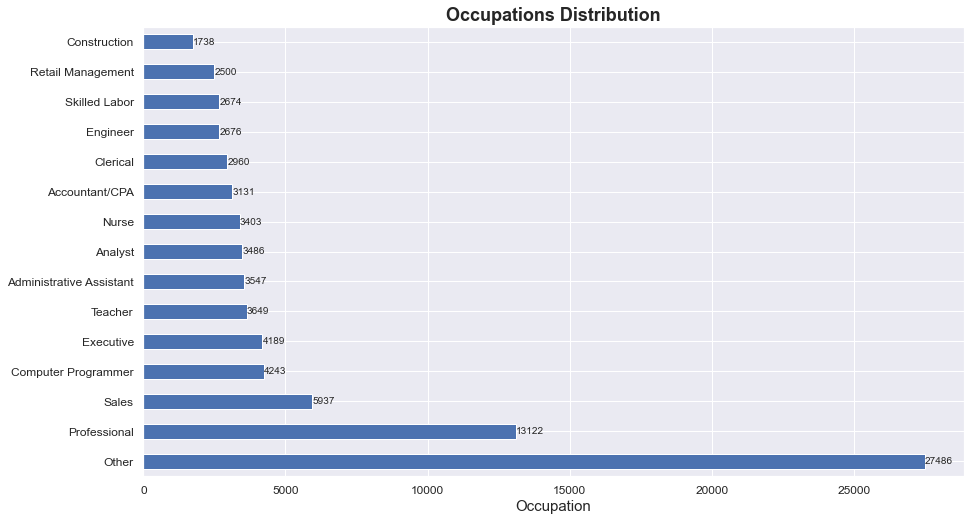

In [35]:
values = df['Occupation'].value_counts()[0:15]
values.plot(kind='barh', figsize=(14.70, 8.27), title="Occupations Distribution")
plt.xlabel("Occupation");
plt.ylabel("");
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(values[i],i), ha='left', va='center');

In [36]:
print("The percent of Other occupation is: {:.4f}%".format(len(df[df['Occupation']=="Other"])/len(df)*100))
print("The percent of professional occupation is: {:.4f}%".format(len(df[df['Occupation']=="Professional"])/len(df)*100))
print("The percent of Computer Programmer occupation is: {:.4f}%".format(len(df[df['Occupation']=="Computer Programmer"])/len(df)*100))
print("The percent of Executive occupation is: {:.4f}%".format(len(df[df['Occupation']=="Executive"])/len(df)*100))
print("The percent of Teacher occupation is: {:.4f}%".format(len(df[df['Occupation']=="Teacher"])/len(df)*100))
print("The percent of Adminstrative Assistant occupation is: {:.4f}%".format(len(df[df['Occupation']=="Administrative Assistant"])/len(df)*100))
print("The percent of Analyst occupation is: {:.4f}%".format(len(df[df['Occupation']=="Analyst"])/len(df)*100))
print("The percent of Nurse occupation is: {:.4f}%".format(len(df[df['Occupation']=="Nurse"])/len(df)*100))
print("The percent of Accountant/CPA occupation is: {:.4f}%".format(len(df[df['Occupation']=="Accountant/CPA"])/len(df)*100))

The percent of Other occupation is: 25.8765%
The percent of professional occupation is: 12.3536%
The percent of Computer Programmer occupation is: 3.9945%
The percent of Executive occupation is: 3.9437%
The percent of Teacher occupation is: 3.4353%
The percent of Adminstrative Assistant occupation is: 3.3393%
The percent of Analyst occupation is: 3.2819%
The percent of Nurse occupation is: 3.2037%
The percent of Accountant/CPA occupation is: 2.9477%


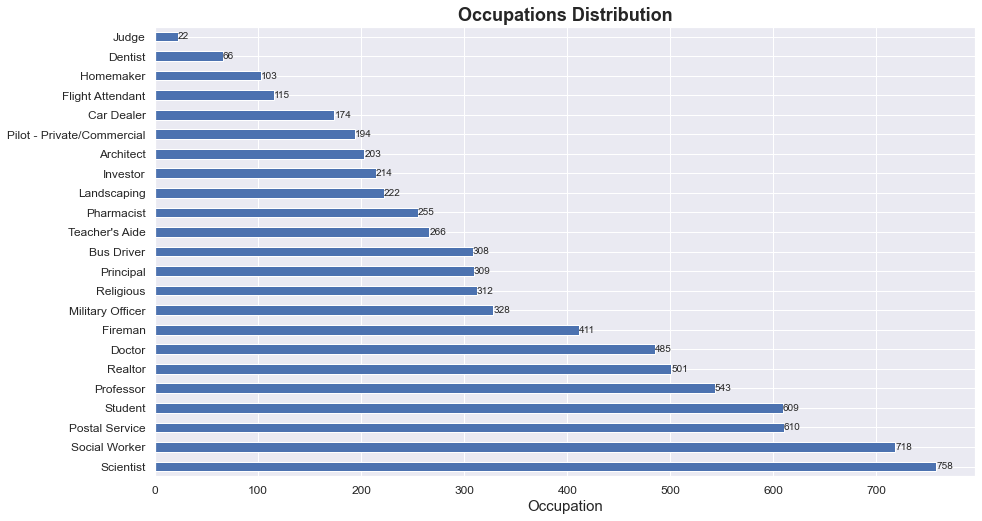

In [37]:
values = df['Occupation'].value_counts()[-23:]
values.plot(kind='barh', figsize=(14.70, 8.27), title="Occupations Distribution")
plt.xlabel("Occupation");
plt.ylabel("");
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(values[i], i), ha='left', va='center');

In [38]:
print("The percent of Scientist occupation is: {:.4f}%".format(len(df[df['Occupation']=="Scientist"])/len(df)*100))
print("The percent of Student occupation is: {:.4f}%".format(len(df[df['Occupation']=="Student"])/len(df)*100))
print("The percent of Professor occupation is: {:.4f}%".format(len(df[df['Occupation']=="Professor"])/len(df)*100))
print("The percent of Fireman occupation is: {:.4f}%".format(len(df[df['Occupation']=="Fireman"])/len(df)*100))
print("The percent of Military Officer occupation is: {:.4f}%".format(len(df[df['Occupation']=="Military Officer"])/len(df)*100))
print("The percent of Teacher's Aide occupation is: {:.4f}%".format(len(df[df['Occupation']=="Teacher's Aide"])/len(df)*100))
print("The percent of Flight Attendant occupation is: {:.4f}%".format(len(df[df['Occupation']=="Flight Attendant"])/len(df)*100))
print("The percent of Homemaker occupation is: {:.4f}%".format(len(df[df['Occupation']=="Homemaker"])/len(df)*100))
print("The percent of Dentist occupation is: {:.4f}%".format(len
                                                             
                                                             (df[df['Occupation']=="Dentist"])/len(df)*100))
print("The percent of Judge occupation is: {:.4f}%".format(len(df[df['Occupation']=="Judge"])/len(df)*100))

The percent of Scientist occupation is: 0.7136%
The percent of Student occupation is: 0.5733%
The percent of Professor occupation is: 0.5112%
The percent of Fireman occupation is: 0.3869%
The percent of Military Officer occupation is: 0.3088%
The percent of Teacher's Aide occupation is: 0.2504%
The percent of Flight Attendant occupation is: 0.1083%
The percent of Homemaker occupation is: 0.0970%
The percent of Dentist occupation is: 0.0621%
The percent of Judge occupation is: 0.0207%


In [39]:
df.groupby(['Occupation'])['LoanOriginalAmount'].describe().sort_values(by=['count', 'mean'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
Other,27486.0,7891.792185,5880.611623,1000.0,3700.25,6000.0,10000.00,35000.0
Professional,13122.0,9339.824036,6661.317858,1000.0,4000.00,7500.0,15000.00,35000.0
Sales,5937.0,7781.004211,6039.212321,1000.0,3500.00,5000.0,10000.00,35000.0
Computer Programmer,4243.0,9614.101343,6924.232595,1000.0,4000.00,8000.0,15000.00,35000.0
Executive,4189.0,11986.441155,7897.339868,1000.0,5000.00,10000.0,15000.00,35000.0
Teacher,3649.0,7963.726226,5650.378941,1000.0,3500.00,6000.0,11500.00,35000.0
Administrative Assistant,3547.0,6674.501551,4759.386935,1000.0,3000.00,5000.0,10000.00,25000.0
Analyst,3486.0,9285.997992,6589.610543,1000.0,4000.00,7500.0,15000.00,35000.0
Nurse,3403.0,9600.094035,6519.415549,1000.0,4000.00,8500.0,15000.00,35000.0


* **25%** of loans were taken by people has occupation other than the listed 
* **12.35** of loans were taken by professional people
* All other listed occupations have less than 3% each
* **Judge & Dentist** are the least borrower occupations with less than 0.06% of the total number of loans in USA. However, **Judges** have the highest `LoanOriginalAmount` average value. But as only 22 judges took loans we cannot take this for granted

In [40]:
df['EmploymentStatus'] = df["EmploymentStatus"].replace({"Full-time": "Employed" })
#check if process is done correctly
df["EmploymentStatus"].value_counts()

Employed         92193
Self-employed     6029
Not available     2959
Other             2474
Part-time         1002
Not employed       801
Retired            762
Name: EmploymentStatus, dtype: int64

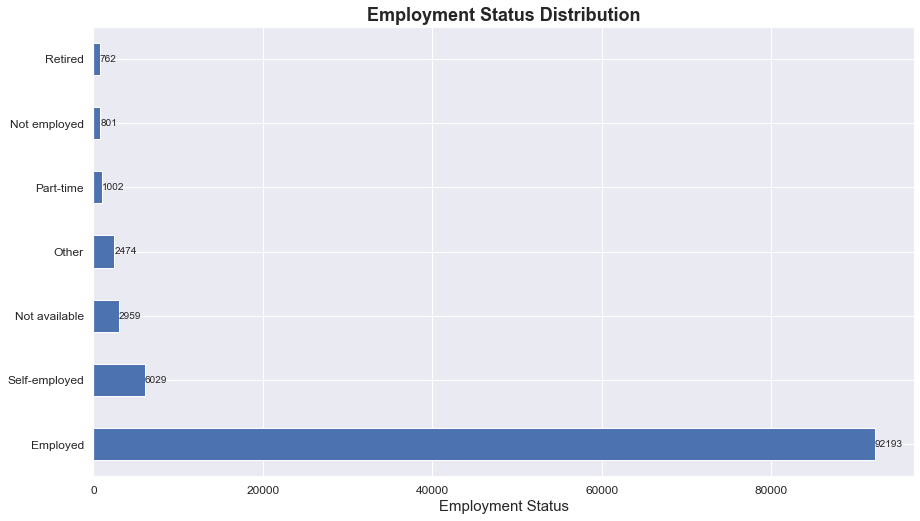

In [41]:
values = df['EmploymentStatus'].value_counts().sort_values(ascending=False)
values.plot(kind='barh', figsize=(14.70, 8.27), title="Employment Status Distribution")
plt.xlabel("Employment Status");
plt.ylabel("");
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(values[i], i), ha='left', va='center');

In [42]:
print(len(df[(df['EmploymentStatus']=='Employed')  | (df['EmploymentStatus']=='Self-employed')])/len(df))
print(len(df[(df['EmploymentStatus']=='Retired')])/len(df))
print(len(df[(df['EmploymentStatus']=='Not employed')])/len(df))
print(len(df[(df['EmploymentStatus']=='Part-time')])/len(df))

0.9247034456787799
0.00717379024665788
0.0075409527395970625
0.009433251741668236


* ``Employment Status`` histogram showed that more than **92%** of loans are usually taken by **employed people**, for full-time or self-employed jobs 
* **Retired people and Not-employed** sectors are the minimum people who take loans. Approximatly the number of loans taken by **each** sector is **0.7%**.

In [43]:
#Study the remaining factors, owning homes and currently in group
print("The percent of people who take loans and owning their homes: {:0.4f}".format(len(df[df['IsBorrowerHomeowner']==True])/len(df)*100))
print("The percent of people who take loans and currently in group: {:0.4f}".format(len(df[df['CurrentlyInGroup']==True])/len(df)*100))

The percent of people who take loans and owning their homes: 51.6287
The percent of people who take loans and currently in group: 9.0868


- Owning home or no does not affect taking loans, both of these categories take loans
- Only 9% of people who belong to groups take loans while the remaining 91% do not belong to groups

## Bivariate Exploration

Let's view the direct relations between each two features in loan df

In [44]:
# The categories will be split to numric, categoric and booleans
# Boolean is binary categorical variables but the split here is to take more space for the visulization
numeric_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'LenderYield']
categoric_vars = ['LoanStatus', 'ListingCategory','EmploymentStatus']
bool_vars = [ 'IsBorrowerHomeowner', 'CurrentlyInGroup']

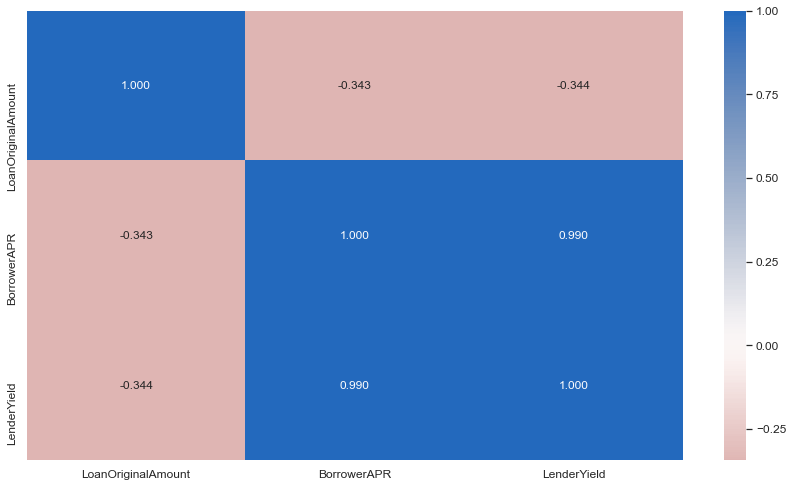

In [45]:
# correlation plot
sb.set(rc={'figure.figsize':(14.70, 8.27),"axes.titlesize":18,"axes.labelsize":15, 'axes.titleweight':'bold','xtick.labelsize': 12, 'ytick.labelsize': 12},style="darkgrid")
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

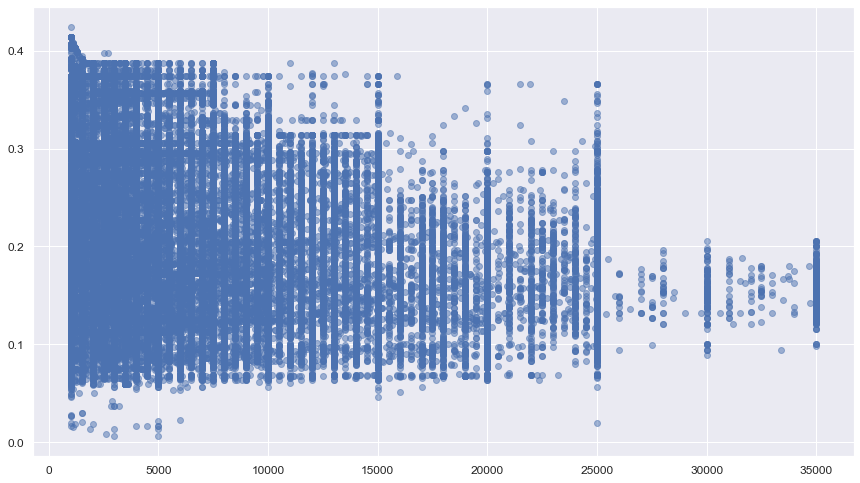

In [46]:
plt.figure(figsize=(14.70, 8.27));
plt.scatter(x=df['LoanOriginalAmount'], y=df['BorrowerAPR'], alpha=0.5);


* The plot showed that `BorrowerAPR` and `LenderYield` are very correlated, one of them can be used to represent both
* Larger `LoanOriginalAmount` got lower `BorrowerAPR` and `LenderYield` values

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


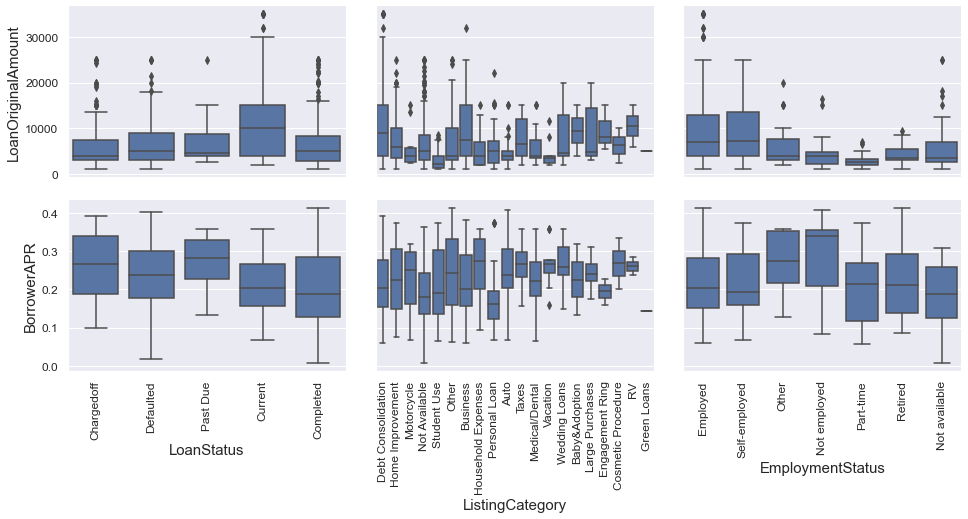

In [47]:
# let's view the relation between numric variables against the categorical variables

samples = np.random.choice(df.shape[0], 2000, replace = False)
df_samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation=90)
sb.set(rc={'figure.figsize':(14.70, 8.27),"axes.titlesize":18,"axes.labelsize":15, 'axes.titleweight':'bold','xtick.labelsize': 12, 'ytick.labelsize': 12},style="darkgrid")
g = sb.PairGrid(data = df_samp, y_vars = ['LoanOriginalAmount', 'BorrowerAPR'], x_vars = categoric_vars,
                size = 3, aspect = 1.5);

g.map(boxgrid)

plt.show();

The plot showed that 
* The people who pay thier premiums regularly are the people who have the highest loan original amount (its median reachs to 12k), while the people who defaulted, past due or charged off loan original amount median value does not exceed 5k
* Lowest APR values are for the people who pay their premiums regularly (current or completed), its median is 0.21. While the people did pay from long time (past due status) their APR value is the highest amongst the others 0.29 
* Regarding `ListiCategory` we can see that there is odd behviour for some categories a **RV**, **Green Loans** , and **Cosmetic Procedure**, therefore we need look closer to these values.
* Retired people usually do not take loans hiher than 2,500 dolars, while other employment statuses take larger loans reaches to 5000. Excpet employed and self-employed people take muvh larger values, on average 6000 and reaches to 12000
* Usually employed (employed, self-employed, part-time) and retired people get the lowest APR 0.21. While Other tyoes got the highest APR values reach to 0.27

Cosmetic Procedure: 91
Boat: 85
Green Loans: 58
RV:  51
Total: 106220


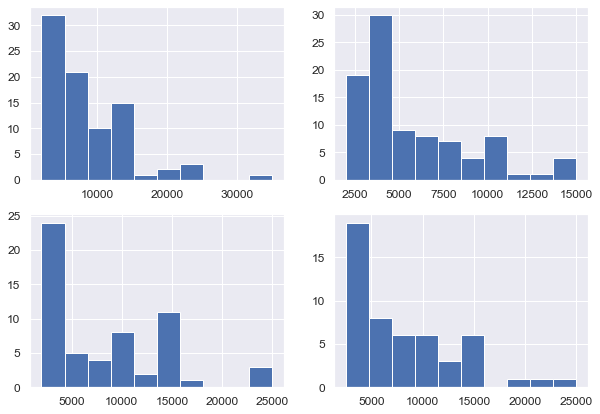

In [48]:
print('Cosmetic Procedure:', str(len(df[df[ 'ListingCategory'] == "Cosmetic Procedure"]['LoanOriginalAmount'])))
print('Boat:', str(len(df[df[ 'ListingCategory'] == "Boat"]['LoanOriginalAmount'])))
print('Green Loans:', str(len(df[df[ 'ListingCategory'] == "Green Loans"]['LoanOriginalAmount'])))
print('RV: ', str(len(df[df[ 'ListingCategory'] == "RV"]['LoanOriginalAmount'])))
print('Total:', str(df.shape[0]))
fig, axs = plt.subplots(2,2,figsize=(10,7))
axs[0, 1].hist(df[df[ 'ListingCategory'] == "Cosmetic Procedure"]['LoanOriginalAmount'])
axs[0, 0].hist(df[df[ 'ListingCategory'] == "Boat"]['LoanOriginalAmount'])
axs[1, 0].hist(df[df[ 'ListingCategory'] == "Green Loans"]['LoanOriginalAmount'])
axs[1, 1].hist(df[df[ 'ListingCategory'] == "RV"]['LoanOriginalAmount']);
plt.figsize=[20,50]

This plot showed that in general these categoires mean original loan amount is less than 5000, is they are very limited categories in the entire dataset a small change can affect the resulted median value.

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


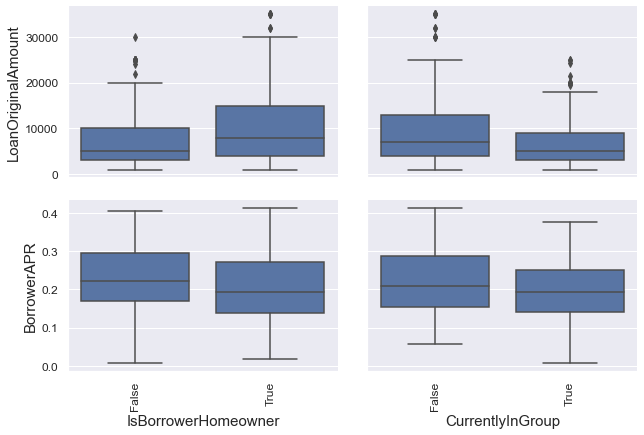

In [49]:
# Let's view the relation between numric variables against the boolean variables

g = sb.PairGrid(data = df_samp, y_vars = ['LoanOriginalAmount', 'BorrowerAPR'], x_vars = bool_vars,
                size = 3, aspect = 1.5)

g.map(boxgrid);

plt.show();

In [50]:
df.groupby('IsBorrowerHomeowner')['LoanOriginalAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
IsBorrowerHomeowner,,,,,,,,
False,51380.0,7243.104321,5410.173012,1000.0,3400.0,5000.0,10000.0,35000.0
True,54840.0,9730.441503,6786.359747,1000.0,4000.0,8000.0,15000.0,35000.0


In [51]:
df.groupby('CurrentlyInGroup')['LoanOriginalAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
CurrentlyInGroup,,,,,,,,
False,96568.0,8719.233659,6308.307432,1000.0,4000.00,7000.0,13000.0,35000.0
True,9652.0,6606.833402,5681.756492,1000.0,2599.75,5000.0,9000.0,35000.0


* `HomeOwners` people take larger loans than who do not. the median value for `HomeOwners` is approx 10000, while the median value for the people who do not is 7000
* `CurrentlyInGroup` people take less loans than who are not. The median value for `CurrentlyInGroup` is approx 5000, while the median value for the people who are not is 7000.
* The people are `CurrentlyInGroup` and take loans forms only 9.08% of the entire studied loans.
* Usually `HomeOwners` have lower `APR` 0.2 than the ones who do not 0.22
* Belonging to group does not affect the `APR` value in both cases the median value is 0.21


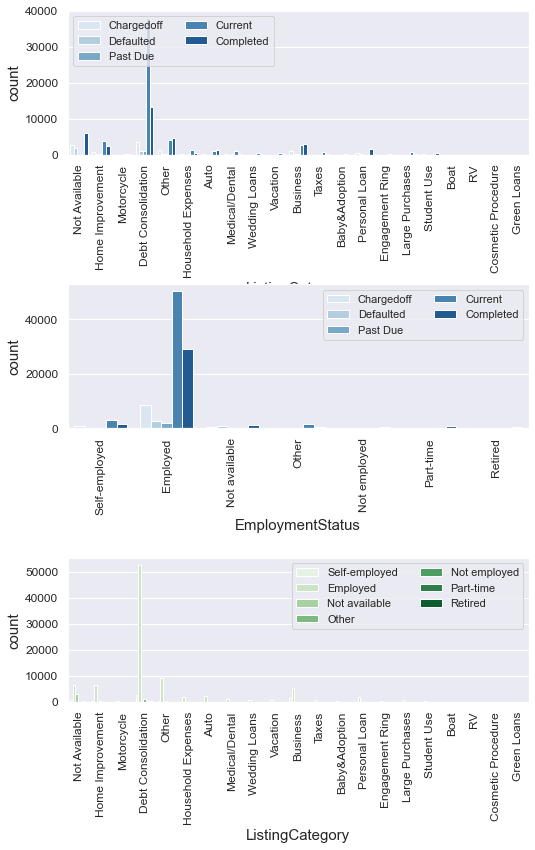

In [52]:
#Let's view the direct relations between catigorical variables
plt.figure(figsize = [8, 8])

# subplot 1: cateogry vs. LoanStatus
ax = plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'ListingCategory', hue = 'LoanStatus', palette = 'Blues')
ax.legend(ncol = 2) 
plt.xticks(rotation=90)
    
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=1.3,  
                    wspace=0.4,  
                    hspace=.9)     

# subplot 2: EmploymentStatus vs. LoanStatus
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Blues')
ax.legend(loc = 1, ncol = 2) 
plt.xticks(rotation=90)
# subplot 3: category vs. EmploymentStatus
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'ListingCategory', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) 
plt.xticks(rotation=90)
plt.show()

The first plot showed that:
* The categories 1 (debt consolidation) and  7 (Others) are the most shown loans
* Most of borrowers pay their premiums regularly or have completed them

The second plot showed that:
* Employed people are the most people who take loans and most of them py their premiums regularly or had completed paying them

The third plot showed that:
* Employed people are the most people who take loans for debt consolidation or other categories

## Multivariate Exploration
Let's view the intrarelations between the variables:

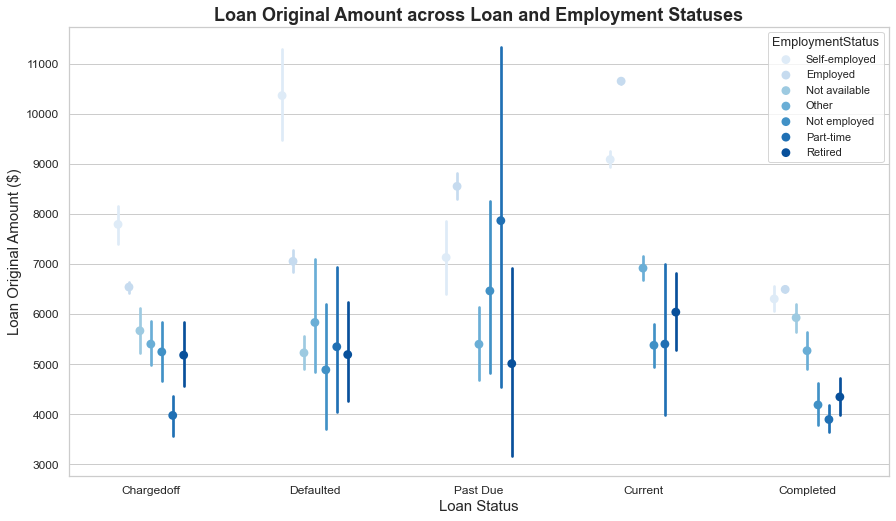

In [53]:
sb.set(rc={'figure.figsize':(14.70, 8.27),"axes.titlesize":18,"axes.labelsize":15, 'axes.titleweight':'bold','xtick.labelsize': 12, 'ytick.labelsize': 12},style="whitegrid")
ax = sb.pointplot(data = df, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount across Loan and Employment Statuses')
plt.ylabel('Loan Original Amount ($)')
plt.xlabel('Loan Status')
plt.show();

In [54]:
df.groupby(['LoanStatus', 'EmploymentStatus'])['LoanOriginalAmount'].describe()

count          mean          std     min  \
LoanStatus EmploymentStatus                                               
Chargedoff Employed           8537.0   6535.828628  5298.579766  1000.0   
           Not available       604.0   5663.713576  5724.077449  1000.0   
           Not employed        179.0   5241.994413  3875.236139  1000.0   
           Other               295.0   5397.837288  3859.609777  2000.0   
           Part-time           185.0   3973.962162  3023.060967  1000.0   
           Retired             173.0   5177.184971  4355.786683  1000.0   
           Self-employed       860.0   7788.212791  6116.645526  1000.0   
Defaulted  Employed           2680.0   7050.852612  5898.300783  1000.0   
           Not available       985.0   5222.848731  5583.938261  1000.0   
           Not employed         25.0   4882.960000  3332.610444  1000.0   
           Other                54.0   5829.407407  4259.589012  1500.0   
           Part-time            56.0   5344.464286  5398.409503  1000.0   
           Retired              54.0   5187.981481  3634.416984  1000.0   
           Self-employed       237.0  10359.476793  7454.510555  1000.0   
Past Due   Employed           1796.0   8547.782294  5691.952851  1500.0   
           Not employed         26.0   6459.615385  4605.692548  2000.0   
           Other               104.0   5394.769231  3902.599794  2000.0   
           Part-time             8.0   7862.500000  5204.376592  3000.0   
           Retired               6.0   5007.166667  2534.976956  1500.0   
           Self-employed       113.0   7127.168142  4041.643513  2000.0   
Current    Employed          50244.0  10647.817331  6643.800034  2000.0   
           Not employed        248.0   5374.669355  3501.088163  2000.0   
           Other              1579.0   6914.289424  4760.343508  2000.0   
           Part-time            24.0   5397.916667  3849.350006  2000.0   
           Retired              92.0   6035.902174  3810.190506  2000.0   
           Self-employed      3085.0   9082.904700  4593.085400  2000.0   
Completed  Employed          28936.0   6490.198472  5167.232100  1000.0   
           Not available      1370.0   5924.659854  5329.039579  1000.0   
           Not employed        323.0   4183.486068  3610.526810  1000.0   
           Other               442.0   5265.468326  3965.557454  1000.0   
           Part-time           729.0   3892.152263  3600.137694  1000.0   
           Retired             437.0   4343.009153  3920.943952  1000.0   
           Self-employed      1734.0   6299.817186  5279.611405  1000.0   

                                 25%      50%       75%      max  
LoanStatus EmploymentStatus                                       
Chargedoff Employed          3000.00   4650.0   8200.00  25000.0  
           Not available     2118.75   3100.0   7000.00  25000.0  
           Not employed      2675.00   4000.0   6849.00  25000.0  
           Other             3000.00   4000.0   6250.00  25000.0  
           Part-time         1850.00   3000.0   5000.00  20000.0  
           Retired           2000.00   4000.0   6975.00  25000.0  
           Self-employed     4000.00   5000.5  10000.00  25000.0  
Defaulted  Employed          3000.00   5000.0   9500.00  25000.0  
           Not available     2000.00   3000.0   5200.00  25000.0  
           Not employed      3000.00   4000.0   5000.00  14000.0  
           Other             3500.00   4000.0   6750.00  20000.0  
           Part-time         2000.00   3525.0   6500.00  25000.0  
           Retired           2500.00   4900.0   6375.25  20300.0  
           Self-employed     4500.00   7500.0  15000.00  25000.0  
Past Due   Employed          4000.00   7000.0  12000.00  35000.0  
           Not employed      3000.00   4600.0  10000.00  15000.0  
           Other             3000.00   4000.0   6000.00  25000.0  
           Part-time         3900.00   5400.0  12000.00  15500.0  
           Retired           3250.00   5271.5   7260.75   7500.0 

In [55]:
df[(df['EmploymentStatus'] == "Self-employed")]['LoanOriginalAmount'].describe()

count     6029.000000
mean      8111.307514
std       5317.538513
min       1000.000000
25%       4000.000000
50%       7000.000000
75%      11000.000000
max      25000.000000
Name: LoanOriginalAmount, dtype: float64

In [56]:
df.groupby(['LoanStatus'])['LoanOriginalAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
LoanStatus,,,,,,,,
Chargedoff,10833.0,6468.811040,5328.184242,1000.0,3000.0,4500.0,8000.0,25000.0
Defaulted,4091.0,6725.076998,5985.507871,1000.0,2600.0,4800.0,8500.0,25000.0
Past Due,2053.0,8270.402338,5567.309881,1500.0,4000.0,6500.0,11000.0,35000.0
Current,55272.0,10420.197008,6533.670355,2000.0,4000.0,10000.0,15000.0,35000.0
Completed,33971.0,6336.431868,5135.900341,1000.0,2800.0,4999.0,8000.0,35000.0


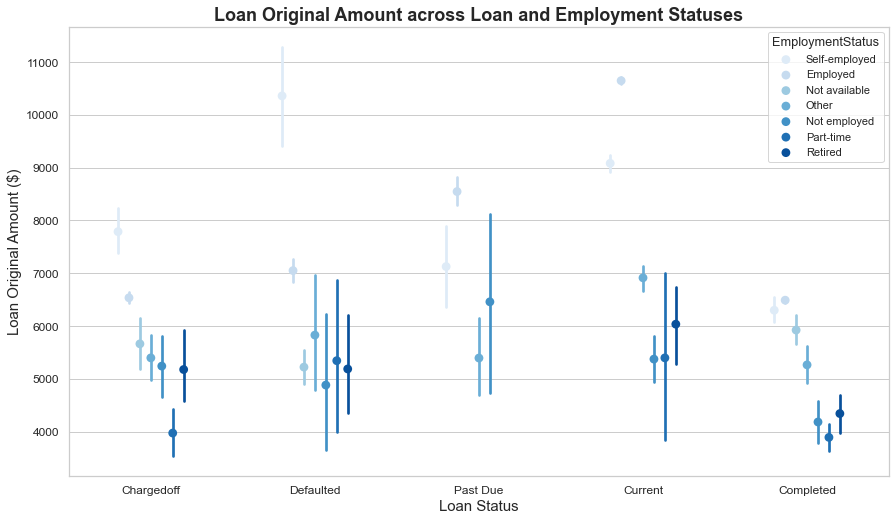

In [57]:
df_represntative = df.groupby(['LoanStatus','EmploymentStatus']).filter(lambda x: len(x) > 10)
ax = sb.pointplot(data = df_represntative, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount across Loan and Employment Statuses')
plt.ylabel('Loan Original Amount ($)')
plt.xlabel('Loan Status')
plt.show();

- Generally the `OriginalLoanAmount` mean value is larger than 6000 dollars
- For `Current` `LoanStatus` `Employed` `EmploymentStatus` have higher average `LoanOriginalAmount` than the mean, they on average take 10,000 dollars
- Generally `Completed` `LoanOriginalAmout` loans have lower values than other types especially for `Retired`, `Part-time` and `Not employed` people with the range of 3700 to 5000 dollars
- `Part-time` people have the lowest `LoanOriginalAmount` for `ChargedOff` `LoanStatus` with approximatly 3900 dollars average value
- The count of of the people in each `EmploymentStatus` and each `LoanStatus` for any employment status other than Employed is vrey few, for example the number of `Part-Time` people is 8 for the `Past Due` `LoanStatus` is 8, therefore we can see in the figure the high diversion in this category

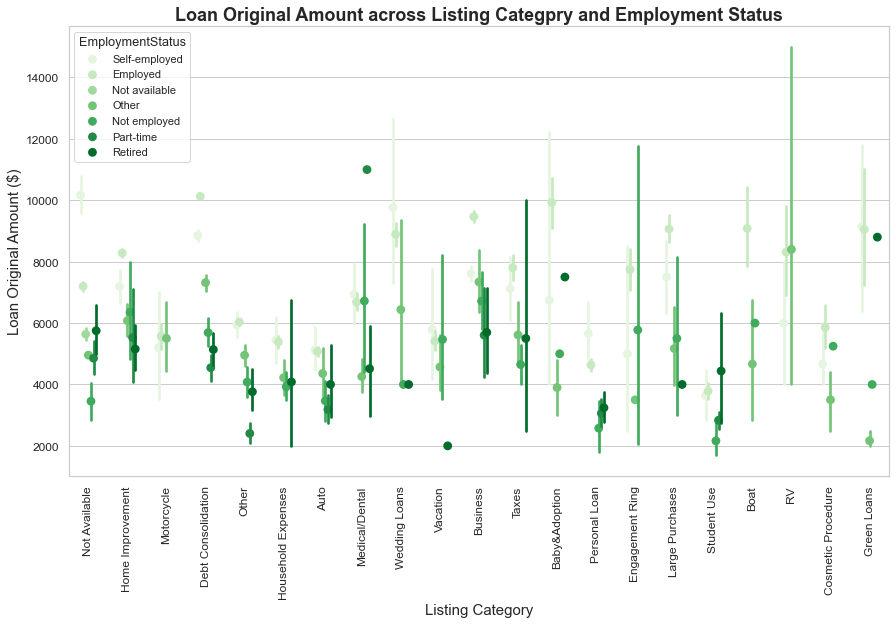

In [58]:
#df_important_categories = df[(df['ListingCategory']!='Other') &(df['ListingCategory']!='Not Available')]

ax = sb.pointplot(data = df, x = 'ListingCategory', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount across Listing Categpry and Employment Status')
plt.ylabel('Loan Original Amount ($)')
plt.xlabel('Listing Category')
plt.xticks(rotation=90)
plt.show();

In [59]:
df.groupby(['ListingCategory'])['LoanOriginalAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
ListingCategory,,,,,,,,
Auto,2559.0,4996.352091,3605.902413,1000.0,2500.00,4000.0,6000.0,35000.0
Baby&Adoption,199.0,9751.396985,5808.873000,2000.0,4000.00,9000.0,15000.0,30000.0
Boat,85.0,8734.117647,6104.600196,2000.0,4000.00,7000.0,12000.0,35000.0
Business,7177.0,8928.715480,6532.274526,1000.0,4000.00,7279.0,13500.0,35000.0
Cosmetic Procedure,91.0,5683.516484,3290.883807,2000.0,3550.00,4000.0,7512.0,15000.0
Debt Consolidation,57184.0,9944.260702,6423.963583,1000.0,4000.00,9500.0,15000.0,35000.0
Engagement Ring,217.0,7636.944700,5066.823282,2000.0,4000.00,6500.0,10000.0,27000.0
Green Loans,58.0,8533.413793,6168.215054,2000.0,3999.25,6000.0,14375.0,25000.0
Home Improvement,7392.0,8099.643669,5859.737342,1000.0,4000.00,6000.0,10500.0,35000.0


In [60]:
df[df['EmploymentStatus']=='Part-time'].groupby(['ListingCategory'])['LoanOriginalAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
ListingCategory,,,,,,,,
Auto,43.0,3183.720930,1547.644944,1000.0,2000.0,3000.0,4250.00,7500.0
Business,57.0,5606.140351,5820.101176,1000.0,2000.0,4000.0,5500.00,25000.0
Debt Consolidation,270.0,4545.148148,3649.857975,1000.0,2000.0,4000.0,5468.75,25000.0
Home Improvement,26.0,5526.923077,4095.906024,1200.0,2250.0,4300.0,7950.00,15000.0
Medical/Dental,1.0,11000.000000,NaN,11000.0,11000.0,11000.0,11000.00,11000.0
Not Available,263.0,4855.684411,4458.269628,1000.0,2000.0,3500.0,6000.00,25000.0
Other,100.0,2404.740000,1666.051945,1000.0,1000.0,2000.0,3000.00,8400.0
Personal Loan,100.0,3059.480000,2203.671732,1000.0,1500.0,2500.0,4000.00,12500.0
Student Use,142.0,2834.471831,1823.826041,1000.0,1500.0,2500.0,3500.00,10000.0


- We an see in the plot there are some dots, these dots are usually for one unqiue scenario (as shown in the `Medical/Dential` `ListingCategory` for `Part-time` `EmploymentStatus` shown in previous table) can not help us in measuring the relation between the `EmploymentStatus`, `ListingCategory` and `LoanOriginalAmount` therefore we need to remove them from the resulted graph to see other values clearer

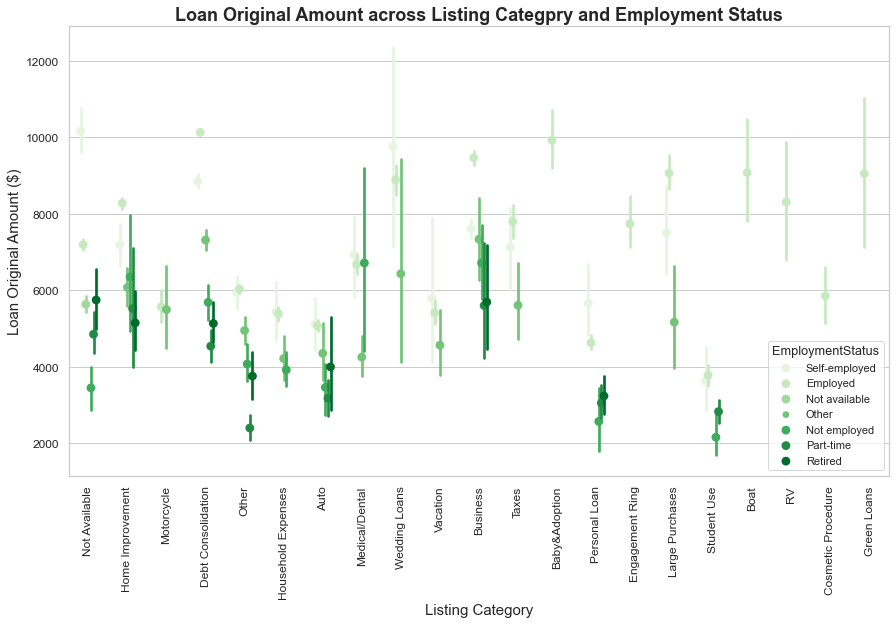

In [61]:
#Let's remove the ones that have less than 10 occurrences
df_represntative = df.groupby(['ListingCategory','EmploymentStatus']).filter(lambda x: len(x) > 10)

ax = sb.pointplot(data = df_represntative, x = 'ListingCategory', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount across Listing Categpry and Employment Status')
plt.ylabel('Loan Original Amount ($)')
plt.xlabel('Listing Category')
plt.xticks(rotation=90)
plt.show();

In [62]:
df_represntative.groupby(['ListingCategory', 'EmploymentStatus'])['LoanOriginalAmount'].describe().sort_values(by=['count', 'mean'], ascending=False).head(40)

,,count,mean,std,min,25%,50%,75%,max
ListingCategory,EmploymentStatus,,,,,,,,
Debt Consolidation,Employed,52601.0,10131.191840,6512.232643,1000.0,4000.00,10000.0,15000.00,35000.0
Other,Employed,9256.0,6037.189607,5107.528604,1000.0,2500.00,4000.0,7500.00,35000.0
Home Improvement,Employed,6683.0,8282.129283,5956.704226,1000.0,4000.00,6500.0,11000.00,35000.0
Not Available,Employed,6579.0,7198.711050,6065.937009,1000.0,3000.00,5000.0,9750.00,25000.0
Business,Employed,5265.0,9466.947198,6876.020371,1000.0,4000.00,7500.0,15000.00,35000.0
Not Available,Not available,2959.0,5637.773910,5503.681402,1000.0,2500.00,3500.0,7000.00,25000.0
Debt Consolidation,Self-employed,2528.0,8847.373022,4687.731727,1000.0,4000.00,9825.0,15000.00,25000.0
Auto,Employed,2303.0,5073.514112,3658.756378,1000.0,2500.00,4000.0,6250.00,35000.0
Personal Loan,Employed,2062.0,4636.246363,4365.128852,1000.0,1962.50,3000.0,6000.00,25000.0


- The plot proves again that the highest mean `LoanOriginalAmount` is usually taken by `Employed` people regardles of the debt `ListingCategory` with 8,816 dollars
- `Personal Loan` is taken usually with low values less than 4000 dollars,  However, `Employed` people take higher than that value on average, and `Self Employed` are the people who take usually personal loans with higher values on average reach to 6000 dollars
- There are some categories as `Business`, `Home Improvement` and `Auto` have very close `LoanOriginalAmount` values

In [63]:
df[df['EmploymentStatus'] == 'Employed']['LoanOriginalAmount'].mean()

8816.654062672871

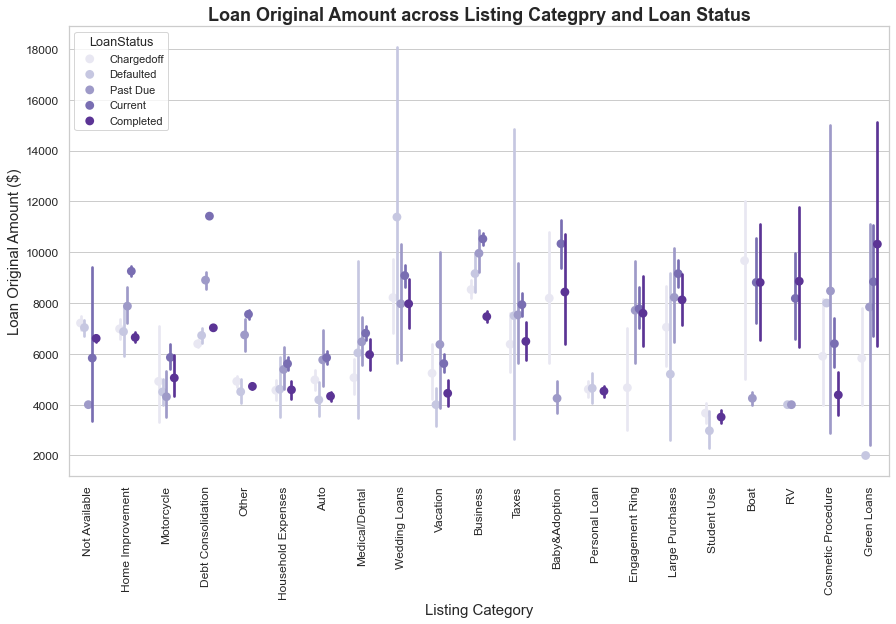

In [64]:

ax = sb.pointplot(data = df, x = 'ListingCategory', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           palette = 'Purples', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount across Listing Categpry and Loan Status')
plt.ylabel('Loan Original Amount ($)')
plt.xlabel('Listing Category')
plt.xticks(rotation=90)
plt.show();

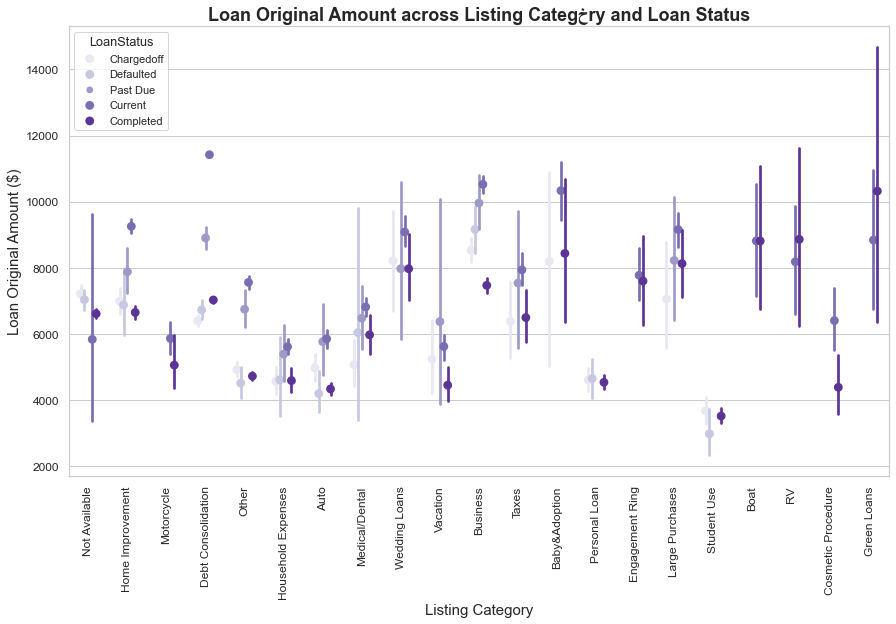

In [65]:
#Let's remove the ones that have less than 10 occurrences
df_represntative = df.groupby(['ListingCategory','LoanStatus']).filter(lambda x: len(x) > 10)

ax = sb.pointplot(data = df_represntative, x = 'ListingCategory', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           palette = 'Purples', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount across Listing Categخry and Loan Status')
plt.ylabel('Loan Original Amount ($)')
plt.xlabel('Listing Category')
plt.xticks(rotation=90)
plt.show();

In [66]:
df_represntative.groupby(['ListingCategory', 'LoanStatus'])['LoanOriginalAmount'].describe().sort_values(by=['count', 'mean'], ascending=False).head(40)

count          mean          std     min  \
ListingCategory    LoanStatus                                               
Debt Consolidation Current     38108.0  11419.194316  6523.562239  2000.0   
                   Completed   13260.0   7024.912293  5077.752463  1000.0   
Not Available      Completed    5992.0   6609.281208  5639.163375  1000.0   
Other              Completed    4569.0   4719.979864  4087.355095  1000.0   
                   Current      4124.0   7557.253395  5731.317829  2000.0   
Home Improvement   Current      3922.0   9253.174656  6174.816733  2000.0   
Debt Consolidation Chargedoff   3652.0   6393.965225  4694.618811  1000.0   
Business           Completed    2855.0   7467.104028  6082.422735  1000.0   
                   Current      2733.0  10524.102086  6799.276412  2000.0   
Not Available      Chargedoff   2641.0   7213.278682  6457.920521  1000.0   
Home Improvement   Completed    2450.0   6647.364898  5075.967746  1000.0   
Not Available      Defaulted    1977.0   7034.272635  6732.162596  1000.0   
Personal Loan      Completed    1609.0   4533.466750  4410.248965  1000.0   
Household Expenses Current      1301.0   5611.126826  4393.149446  2000.0   
Other              Chargedoff   1224.0   4917.340686  4064.226233  1000.0   
Auto               Completed    1218.0   4333.151067  3074.712407  1000.0   
Debt Consolidation Past Due     1120.0   8900.842857  5801.934803  1500.0   
Business           Chargedoff   1108.0   8529.984657  6147.621066  1000.0   
Medical/Dental     Current      1057.0   6811.917692  4899.094305  2000.0   
Debt Consolidation Defaulted    1044.0   6724.046935  4805.630490  1000.0   
Auto               Current       966.0   5849.061077  4112.154659  2000.0   
Home Improvement   Chargedoff    669.0   6983.417040  5323.109226  1000.0   
Large Purchases    Current       641.0   9155.076443  6681.803444  2000.0   
Taxes              Current       635.0   7936.012598  5905.708171  2000.0   
Personal Loan      Chargedoff    576.0   4607.293403  4120.502393  1000.0   
Wedding Loans      Current       573.0   9081.062827  5429.336870  2000.0   
Student Use        Completed     560.0   3512.803571  2979.347251  1000.0   
Vacation           Current       534.0   5618.230337  4255.751082  2000.0   
Household Expenses Completed     376.0   4584.885638  3406.779700  2000.0   
Business           Defaulted     301.0   9158.667774  6589.033471  1000.0   
Auto               Chargedoff    267.0   4974.277154  3387.801770  1000.0   
Other              Defaulted     266.0   4509.665414  3809.162638  1000.0   
Medical/Dental     Completed     240.0   5969.700000  4654.290648  2000.0   
Other              Past Due      212.0   6744.070755  4377.805402  1500.0   
Home Improvement   Past Due      210.0   7878.185714  5275.056783  2000.0   
Household Expenses Chargedoff    203.0   4565.709360  2944.543051  2000.0   
Motorcycle         Current       201.0   5859.880597  3460.550792  2000.0   
Personal Loan      Defaulted     198.0   4647.232323  4208.000564  1000.0   
Business           Past Due      180.0   9958.088889  5798.004808  2000.0   
Taxes              Completed     163.0   6491.601227  5013.914975  2000.0   

                                   25%      50%       75%      max  
ListingCategory    LoanStatus                                       
Debt Consolidation Current     6000.00  10000.0  15000.00  35000.0  
                   Completed   3500.00   5000.0  10000.00  35000.0  
Not Available      Completed   2750.00   5000.0   9000.00  25000.0  
Other              Completed   2000.00   3500.0   6000.00  31000.0  
                   Current     4000.00   5000.0  10000.00  35000.0  
Home Improvement   Current     4000.00   8000.0  13000.00  35000.0  
Debt Consolidation Chargedoff  3000.00   5000.0   8000.00  25000.0  
Business           Completed   3000.00   5000.0  10000.00  35000.0  
                   Current     4000.00  10000.0  15000.00  35000.0  
Not Available      Chargedoff  3000.00 

In [67]:
df_represntative.groupby(['ListingCategory'])['LoanOriginalAmount'].describe().sort_values(by=['count', 'mean'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
ListingCategory,,,,,,,,
Debt Consolidation,57184.0,9944.260702,6423.963583,1000.0,4000.0,9500.0,15000.0,35000.0
Not Available,10622.0,6837.680192,6070.424510,1000.0,2700.0,5000.0,9000.0,25000.0
Other,10395.0,5904.746513,4995.412265,1000.0,2500.0,4000.0,7500.0,35000.0
Home Improvement,7392.0,8099.643669,5859.737342,1000.0,4000.0,6000.0,10500.0,35000.0
Business,7177.0,8928.715480,6532.274526,1000.0,4000.0,7279.0,13500.0,35000.0
Auto,2559.0,4996.352091,3605.902413,1000.0,2500.0,4000.0,6000.0,35000.0
Personal Loan,2383.0,4560.764163,4323.747454,1000.0,1700.0,3000.0,5500.0,25000.0
Household Expenses,1975.0,5288.395949,4073.891530,2000.0,3000.0,4000.0,6000.0,35000.0
Medical/Dental,1500.0,6516.557333,4780.572594,2000.0,3207.5,4075.0,9000.0,25000.0


In [68]:
df_represntative.groupby(['LoanStatus'])['LoanOriginalAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
LoanStatus,,,,,,,,
Chargedoff,10801.0,6470.732432,5333.163384,1000.0,3000.0,4500.0,8000.0,25000.0
Defaulted,4063.0,6725.569776,5984.293646,1000.0,2600.0,4800.0,8500.0,25000.0
Past Due,2022.0,8308.448566,5588.176454,1500.0,4000.0,6621.5,11000.0,35000.0
Current,55272.0,10420.197008,6533.670355,2000.0,4000.0,10000.0,15000.0,35000.0
Completed,33971.0,6336.431868,5135.900341,1000.0,2800.0,4999.0,8000.0,35000.0


In [69]:
df_represntative.groupby(['ListingCategory', 'LoanStatus'])['LoanOriginalAmount'].describe().sort_values(by=['count', 'mean'], ascending=False).tail(36)

,,count,mean,std,min,25%,50%,75%,max
ListingCategory,LoanStatus,,,,,,,,
Student Use,Chargedoff,154.0,3668.142857,2714.816303,1000.0,1612.5,3000.0,5000.0,15000.0
Baby&Adoption,Current,153.0,10332.209150,5809.326925,2000.0,5000.0,10000.0,15000.0,30000.0
Vacation,Completed,151.0,4447.682119,3107.664384,2000.0,2500.0,4000.0,5000.0,15000.0
Engagement Ring,Current,145.0,7772.172414,5030.630906,2000.0,4000.0,6500.0,10000.0,27000.0
Large Purchases,Completed,141.0,8125.177305,5980.347649,2000.0,4000.0,6000.0,11000.0,25000.0
Home Improvement,Defaulted,141.0,6874.085106,5973.064694,1000.0,3000.0,4500.0,9000.0,25000.0
Wedding Loans,Completed,128.0,7969.945312,5717.724073,2000.0,4000.0,5000.0,10250.0,25000.0
Medical/Dental,Chargedoff,118.0,5062.516949,3795.773197,2000.0,3000.0,4000.0,5000.0,25000.0
Motorcycle,Completed,87.0,5053.448276,3964.822008,2000.0,3325.0,4000.0,5250.0,35000.0


The previous charts and descripotions showed:
- The types: `Green Loans`, `Cosmetic Procedure`, `RV` and `Boat` have the lowest number of instances in dataframe and that explains the huge variance shown in the plot as `Completed` Loans for `Green Loans` `ListingCategory` from 7000 to 15000 dollars

- As all previous conclusions before, `Current` loans average of `LoanOriginalAmount`
- The number of `Completed` loans usually larger than the number of `Current` loans with lower average of `LoanOriginalAmaount` especially for `Debt Consolidation`, `Other`, `Not Available` and `Personal Loan`. This can be expected as people will complete more small debts, and will take long time to pay for high debts
- But this did not happen with `Home Improvement` loans as usually people take large `LoanOriginalAmount` for improving their homes, therefore, the count of the `Current` loans is larger han the count of the `Completed` loans
- The lowest `ListingCategory` `LoanOriginalAmount` average value is for `Student Use`, regardless of the `LoanStatus`, with  3500 dollars
- Generally any category have close `LoanOriginalAmount` regardless of `LoanStatus` type, however, the `Debt Consolidation` have different `LoanOriginalAmount`. For example `Completed` loans have the average of 7,024 dollars `LoanOriginalAmount` while its for `Current` `LoanStatus` for the same category `Debt Consolidation` is 11,419 dollars

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Invesitgating deeply with the `OriginalLoanAmout` versus `EmploymentStatus` and `LoanStatus` showed that not only **Employed** people are the largest part of community who take loans, and pays the premiums regularly, but also who take larger average of loans with approximatly **11,419 dollars** versus the entire dataset mean **8,527 dollars** 


### Were there any interesting or surprising interactions between features?
 
The investigation showed the following relations:

- Generally, the `LoanOriginalAmount` on average ranges are between 7,000 and 10,000 dollars regardless of the  `BorrowerState`. However, for the smallest population states the `LoanOriginalAmount` averages are much less than that reaches to 4,244

- People with **Professional** `Occubation` form **12.35%** of the total number studied loans
- **Judges & Dentists** are the least borrower `Occupations` with less than **0.06%** of the total number studied loans


- More than **92%** of the loans are taken by `Employed` people, while only **1.4%** of loans are taken by `Retired` or `Not Employed`people

- The average `LoanOriginalAmount` is **8527 dollars**. However, when cosolidating the debts, or `Debt Consolidation` category for the `Employed` people the average value of loans is larger, it is **11,419**

In [70]:
# Keep the clean dataset
df.to_csv("prosper_loan_data_clean.csv",  index=False)